In [14]:

# Standard useful data processing imports
import random
import numpy as np
import pandas as pd
# Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
# Scikit learn for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras as keras


In [15]:
import pandas as pd

# Load the CSV file
data = pd.read_csv("C:\\Users\\karpu\\OneDrive\\Desktop\\data.csv")

# Display the first few rows of the DataFrame to verify the data
print(data.head())


   pixel_0000  pixel_0001  pixel_0002  pixel_0003  pixel_0004  pixel_0005  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   pixel_0006  pixel_0007  pixel_0008  pixel_0009  ...  pixel_1015  \
0           0           0           0           0  ...           0   
1           0           0           0           0  ...           0   
2           0           0           0           0  ...           0   
3           0           0           0           0  ...           0   
4           0           0           0           0  ...           0   

   pixel_1016  pixel_1017  pixel_1018  pixel_1019  pixel_1020  pixel_1021  \
0           0           0           0  

In [16]:
data.head(n=6)

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [17]:
data.groupby("character").count()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
character,,,,,,,,,,,,,,,,,,,,,
character_01_ka,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_02_kha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_03_ga,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_04_gha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_05_kna,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_06_cha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_07_chha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_08_ja,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_09_jha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000


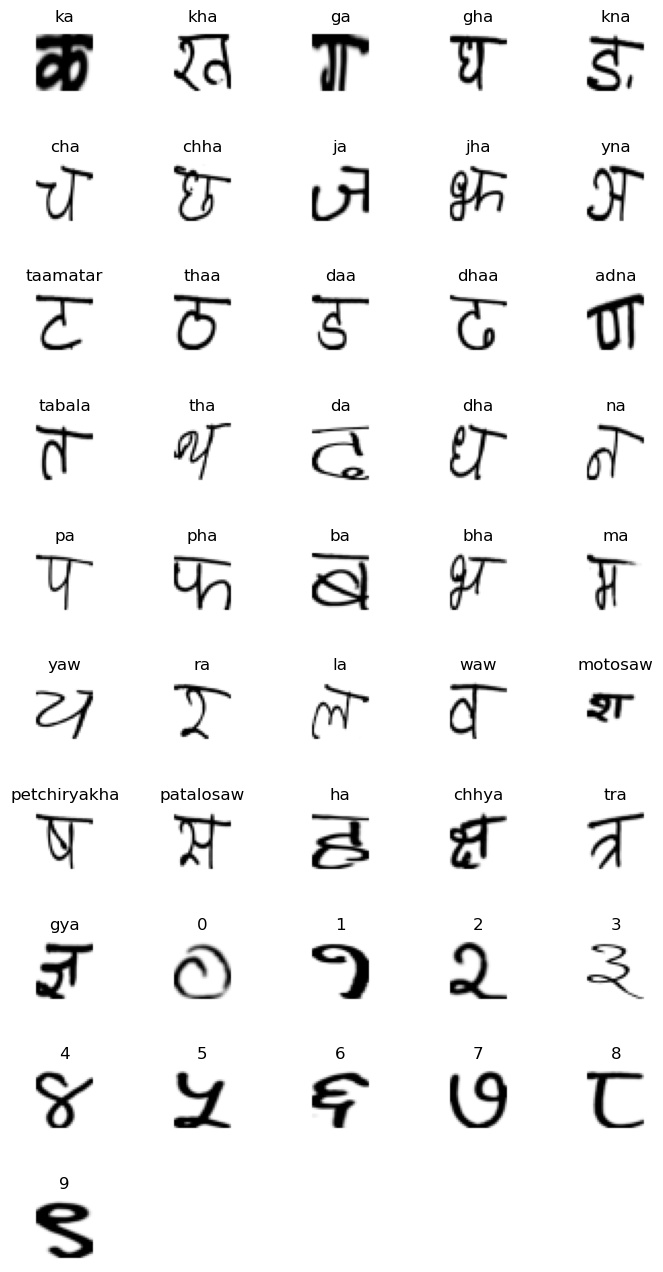

In [18]:
char_names = data.character.unique()  
rows =10;columns=5;
fig, ax = plt.subplots(rows,columns, figsize=(8,16))
for row in range(rows):
    for col in range(columns):
        ax[row,col].set_axis_off()
        if columns*row+col < len(char_names):
            x = data[data.character==char_names[columns*row+col]].iloc[0,:-1].values.reshape(32,32)
            x = x.astype("float64")
            x/=255
            ax[row,col].imshow(x, cmap="binary")
            ax[row,col].set_title(char_names[columns*row+col].split("_")[-1])

            
plt.subplots_adjust(wspace=1, hspace=1)   
plt.show()

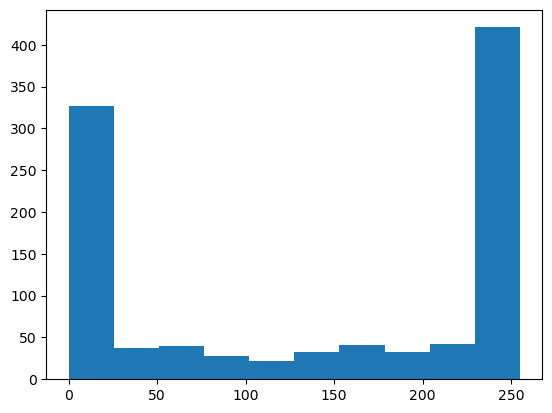

In [19]:
#Verifying the pixel distribution of any random character
import matplotlib.pyplot as plt
plt.hist(data.iloc[0,:-1])
plt.show()

In [20]:
X = data.values[:,:-1]/255.0
Y = data["character"].values
#Let us minimize the memory consumption
del data
n_classes = 46

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("C:\\Users\\karpu\\OneDrive\\Desktop\\data.csv")

# Assuming 'data' is your DataFrame containing the dataset
# Assuming 'X' contains the features (e.g., images) and 'y' contains the labels (e.g., characters)
X = data.drop(columns=['character'])  # Assuming 'character' is the column containing the labels
y = data['character']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets to verify the split
print("Training set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nTesting set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Training set shapes:
X_train: (73600, 1024)
y_train: (73600,)

Testing set shapes:
X_test: (18400, 1024)
y_test: (18400,)


In [22]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Assuming 'n_classes' is the number of unique classes in your dataset
n_classes = len(data['character'].unique())

# Let's split the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Encode the categories
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_train = to_categorical(y_train, num_classes=n_classes)
y_test = to_categorical(y_test, num_classes=n_classes)


In [24]:
img_height_rows = 32
img_width_cols = 32
im_shape = (img_height_rows, img_width_cols, 1)
x_train = x_train.reshape(x_train.shape[0], *im_shape) # Python TIP :the * operator unpacks the tuple
x_test = x_test.reshape(x_test.shape[0], *im_shape)

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the input shape
input_shape = (32, 32, 1)

# Initialize the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Add fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))  # Output layer with softmax activation for multiclass classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


C:\Users\karpu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,790 (1.22 MB)

 Trainable params: 319,790 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
cnn = Sequential()

In [27]:
kernelSize = (3, 3)
ip_activation = 'relu'
ip_conv_0 = Conv2D(filters=32, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation)
cnn.add(ip_conv_0)

In [28]:
op_activation = 'softmax'
output_layer = Dense(units=n_classes, activation=op_activation, kernel_initializer='uniform')
cnn.add(output_layer)
opt = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
# Compile the classifier using the configuration we want
cnn.compile(optimizer=opt, loss=loss, metrics=metrics)

In [29]:
print(cnn.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30, 30, 46)     │         1,518 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,838 (7.18 KB)

 Trainable params: 1,838 (7.18 KB)

 Non-trainable params: 0 (0.00 B)

None


In [30]:
history = model.fit(x_train, y_train,
                    batch_size=32, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.6559 - loss: 1.8767 - val_accuracy: 0.9316 - val_loss: 0.2321
Epoch 2/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.9477 - loss: 0.1724 - val_accuracy: 0.9451 - val_loss: 0.1937
Epoch 3/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9662 - loss: 0.1065 - val_accuracy: 0.9477 - val_loss: 0.2000
Epoch 4/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9735 - loss: 0.0816 - val_accuracy: 0.9577 - val_loss: 0.1644
Epoch 5/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9812 - loss: 0.0610 - val_accuracy: 0.9551 - val_loss: 0.1812
Epoch 6/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9838 - loss: 0.0527 - val_accuracy: 0.9521 - val_loss: 0.2113
Epoch 7/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.9847 - loss: 0.0493 - val_accuracy: 0.9565 - val_loss: 0.1996
Epoch 8/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.9866 - 

In [31]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))


Accuracy: 95.79%


Epoch 1/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9882 - loss: 0.0405 - val_accuracy: 0.9606 - val_loss: 0.2367
Epoch 2/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.9908 - loss: 0.0324 - val_accuracy: 0.9482 - val_loss: 0.3731
Epoch 3/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.9893 - loss: 0.0456 - val_accuracy: 0.9611 - val_loss: 0.2632
Epoch 4/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.9921 - loss: 0.0305 - val_accuracy: 0.9583 - val_loss: 0.3154
Epoch 5/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.9908 - loss: 0.0357 - val_accuracy: 0.9587 - val_loss: 0.3020
Epoch 6/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.9911 - loss: 0.0359 - val_accuracy: 0.9602 - val_loss: 0.3525
Epoch 7/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.9915 - loss: 0.0401 - val_accuracy: 0.9578 - val_loss: 0.3698
Epoch 8/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9908 -

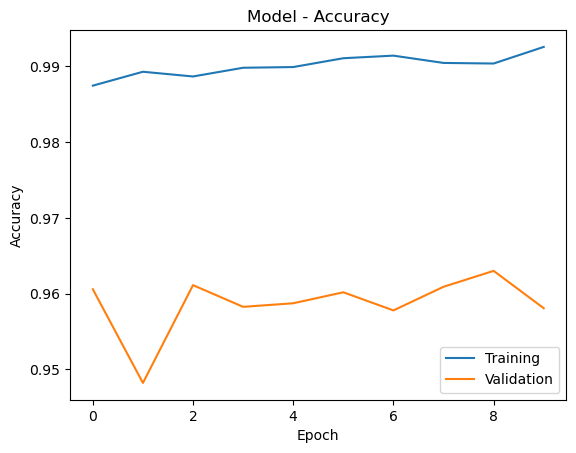

In [32]:
# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

# Plot accuracy
fig1, ax_acc = plt.subplots()
plt.plot(history.history['accuracy'])  # Use 'accuracy' instead of 'acc'
plt.plot(history.history['val_accuracy'])  # Use 'val_accuracy' instead of 'val_acc'
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()


In [33]:
#ResNet
from keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, AveragePooling2D, Flatten, Dense
from keras.models import Model

def residual_block(x, filters, kernel_size=(3, 3), strides=(1, 1), activation='relu'):
    """
    Implementation of a basic residual block.
    """
    # Shortcut connection
    shortcut = x
    
    # First convolutional layer
    x = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    
    # Second convolutional layer
    x = Conv2D(filters=filters, kernel_size=kernel_size, strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    
    # Skip connection (shortcut)
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters=filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)
        shortcut = BatchNormalization()(shortcut)
    
    x = Add()([x, shortcut])  # Element-wise addition
    x = Activation(activation)(x)
    
    return x

def build_resnet(input_shape, num_classes):
    """
    Build ResNet model.
    """
    # Input layer
    inputs = Input(shape=input_shape)
    
    # Initial convolutional layer
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    
    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=128)
    
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=256)
    
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)
    x = residual_block(x, filters=512)
    
    # Final layers
    x = AveragePooling2D(pool_size=(7, 7))(x)
    x = Flatten()(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    # Create model
    model = Model(inputs=inputs, outputs=outputs)
    
    return model

# Define input shape and number of classes
input_shape = (32, 32, 1)  # Assuming 32x32 grayscale images
num_classes = len(data['character'].unique())  # Number of unique classes in your dataset

# Build ResNet model
resnet_model = build_resnet(input_shape, num_classes)

# Compile the model
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
resnet_model.summary()


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 32, 32, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 16, 16,    │      3,200 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 16, 16,    │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 8, 8, 64)  │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 8, 8, 64)  │     36,928 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 64)  │        256 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 8, 8, 64)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 8, 8, 64)  │     36,928 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 64)  │        256 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 8, 8, 64)  │          0 │ batch_normalizat… │
│                     │                   │            │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 8, 8, 64)  │          0 │ add[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 8, 8, 64)  │     36,928 │ activation_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 64)  │        256 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 8, 8, 64)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 8, 8, 64)  │     36,928 │ activation_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 64)  │        256 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 8, 8, 64)  │          0 │ batch_normalizat… │
│                     │                   │            │ activation_2[0][

 Total params: 21,303,982 (81.27 MB)

 Trainable params: 21,286,958 (81.20 MB)

 Non-trainable params: 17,024 (66.50 KB)

In [34]:
model_1=Sequential()
model_1.add(Conv2D(64,(3,3), strides=(1, 1), padding='same', input_shape=(32,32,3),activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(64,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(64,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(64,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(64,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(64,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(64,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(BatchNormalization())

model_1.add(Conv2D(128,(3,3), strides=(2, 2), padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(128,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(128,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(128,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(128,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(128,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(128,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(128,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(BatchNormalization())

model_1.add(Conv2D(256,(3,3), strides=(2, 2), padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(256,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(256,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(256,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(256,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(256,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(256,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(256,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(256,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(256,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(256,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(256,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(BatchNormalization())

model_1.add(Conv2D(512,(3,3), strides=(2,2), padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(512,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(512,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(512,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(512,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(512,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(AveragePooling2D(pool_size=(2, 2)))
model_1.add(Flatten())
model_1.add(Dense(46,activation='softmax'))
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 21,220,270 (80.95 MB)

 Trainable params: 21,205,038 (80.89 MB)

 Non-trainable params: 15,232 (59.50 KB)

In [35]:
from keras.optimizers import SGD

In [36]:
history = model.fit(x_train, y_train,
                    batch_size=32, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.9933 - loss: 0.0360 - val_accuracy: 0.9626 - val_loss: 0.3992
Epoch 2/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9933 - loss: 0.0370 - val_accuracy: 0.9609 - val_loss: 0.4813
Epoch 3/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9933 - loss: 0.0397 - val_accuracy: 0.9639 - val_loss: 0.4271
Epoch 4/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9945 - loss: 0.0312 - val_accuracy: 0.9625 - val_loss: 0.4705
Epoch 5/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9949 - loss: 0.0284 - val_accuracy: 0.9571 - val_loss: 0.5744
Epoch 6/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.9927 - loss: 0.0482 - val_accuracy: 0.9633 - val_loss: 0.5659
Epoch 7/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.9947 - loss: 0.0361 - val_accuracy: 0.9626 - val_loss: 0.5504
Epoch 8/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.9947 -

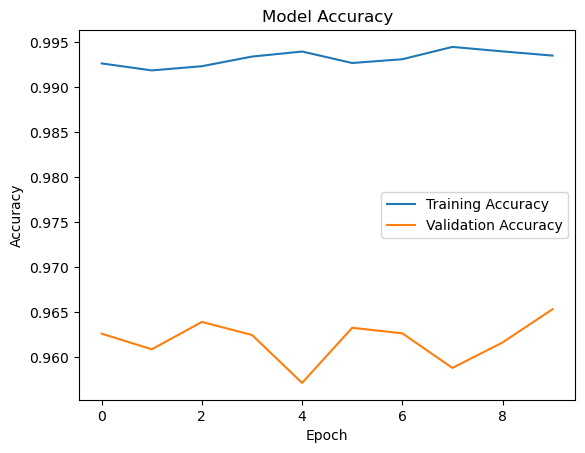

In [37]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()


In [38]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 96.53%


In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np

# Example training code
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()  # Replace with your dataset
X_train = X_train / 255.0
X_test = X_test / 255.0

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Replace 10 with the number of Devanagari characters
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5)
model.evaluate(X_test, y_test)

# Save the model
model.save('devanagari_model.h5')


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9120 - loss: 0.2992
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9848 - loss: 0.0480
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9910 - loss: 0.0304
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9938 - loss: 0.0186
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9970 - loss: 0.0105
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9831 - loss: 0.0527


Predicted: ल
Actual: ए


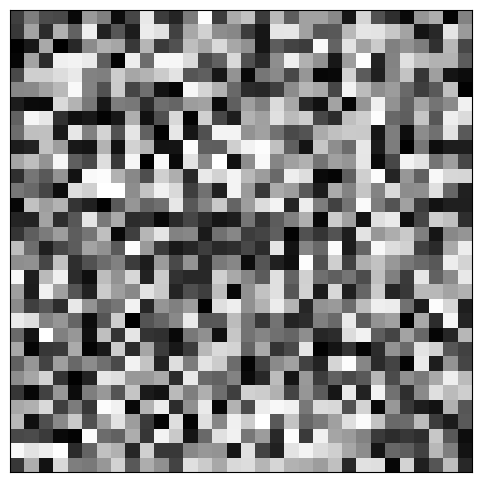

Predicted: द
Actual: ड


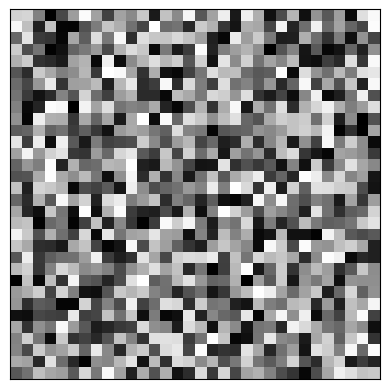

Predicted: घ
Actual: औ


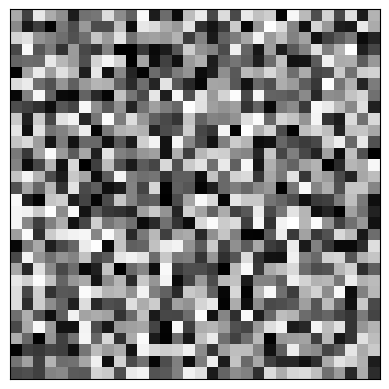

Predicted: स
Actual: च


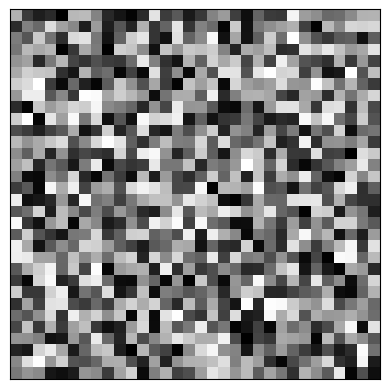

Predicted: ञ
Actual: भ


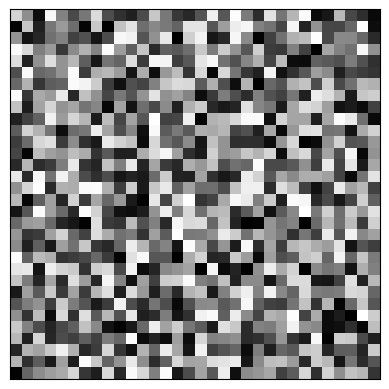

Predicted: ल
Actual: भ


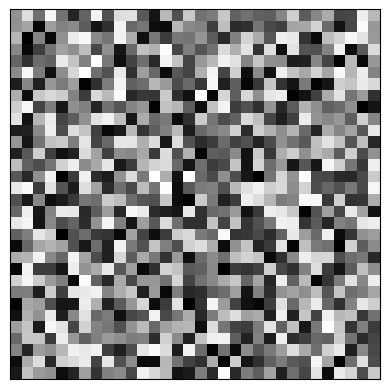

In [42]:

# Define a dictionary mapping indices to Devanagari characters
Char_Dict = {
    0: 'अ', 1: 'आ', 2: 'इ', 3: 'ई', 4: 'उ', 5: 'ऊ', 6: 'ऋ', 7: 'ए', 8: 'ऐ', 9: 'ओ', 10: 'औ', 11: 'क', 12: 'ख', 
    13: 'ग', 14: 'घ', 15: 'ङ', 16: 'च', 17: 'छ', 18: 'ज', 19: 'झ', 20: 'ञ', 21: 'ट', 22: 'ठ', 23: 'ड', 24: 'ढ', 
    25: 'ण', 26: 'त', 27: 'थ', 28: 'द', 29: 'ध', 30: 'न', 31: 'प', 32: 'फ', 33: 'ब', 34: 'भ', 35: 'म', 36: 'य', 
    37: 'र', 38: 'ल', 39: 'व', 40: 'श', 41: 'ष', 42: 'स', 43: 'ह', 44: 'क्ष', 45: 'त्र', 46: 'ज्ञ'
}

# Example data (replace these with your actual data)
import numpy as np

# Assuming there are 100 samples
num_samples = 100
num_classes = len(Char_Dict)
image_shape = (32, 32)  # Assuming each image is 32x32

# Randomly generate some data for demonstration
np.random.seed(42)
y1_pred = np.random.randint(0, num_classes, size=num_samples)
y1_test = np.random.randint(0, num_classes, size=num_samples)
X_test1 = np.random.rand(num_samples, 1, *image_shape)  # Random grayscale images

# Find misclassified samples
error = np.where(y1_pred != y1_test)[0]

# Display misclassified samples
plt.figure(figsize=(6, 6))
for i in range(min(6, len(error))):  # Ensure we don't go out of bounds
    print("Predicted:", Char_Dict[y1_pred[error[i]]])
    print("Actual:", Char_Dict[y1_test[error[i]]])
    plt.imshow(X_test1[error[i], 0], cmap='gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.show()


Predicted: ल
Actual: ए


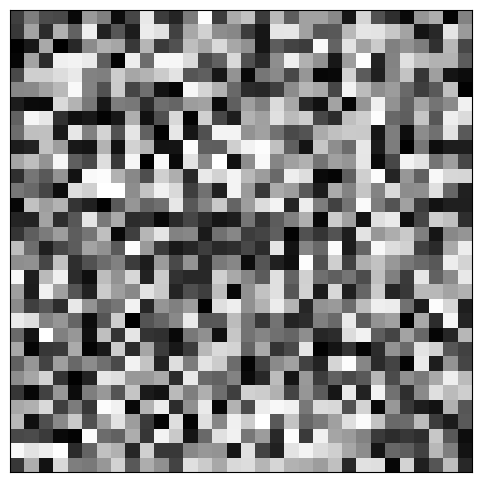

Predicted: द
Actual: ड


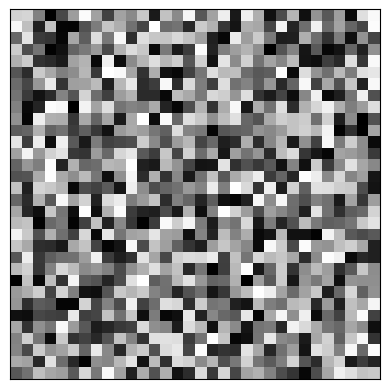

Predicted: घ
Actual: औ


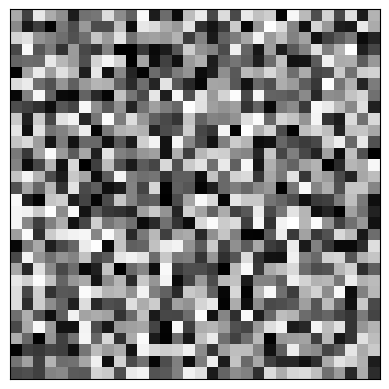

Predicted: स
Actual: च


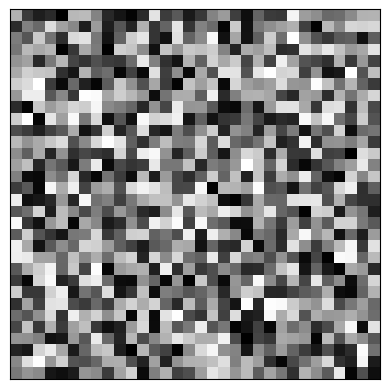

Predicted: ञ
Actual: भ


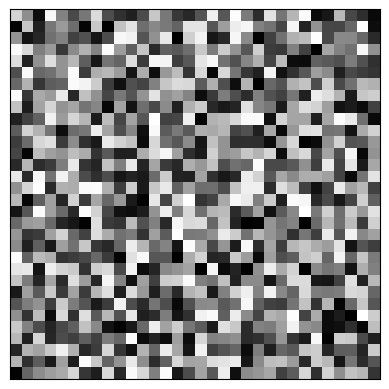

Predicted: ल
Actual: भ


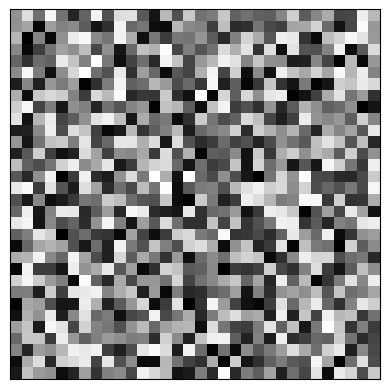

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Define a dictionary mapping indices to Devanagari characters
Char_Dict = {
    0: 'अ', 1: 'आ', 2: 'इ', 3: 'ई', 4: 'उ', 5: 'ऊ', 6: 'ऋ', 7: 'ए', 8: 'ऐ', 9: 'ओ', 10: 'औ', 11: 'क', 12: 'ख', 
    13: 'ग', 14: 'घ', 15: 'ङ', 16: 'च', 17: 'छ', 18: 'ज', 19: 'झ', 20: 'ञ', 21: 'ट', 22: 'ठ', 23: 'ड', 24: 'ढ', 
    25: 'ण', 26: 'त', 27: 'थ', 28: 'द', 29: 'ध', 30: 'न', 31: 'प', 32: 'फ', 33: 'ब', 34: 'भ', 35: 'म', 36: 'य', 
    37: 'र', 38: 'ल', 39: 'व', 40: 'श', 41: 'ष', 42: 'स', 43: 'ह', 44: 'क्ष', 45: 'त्र', 46: 'ज्ञ'
}

# Example data (replace these with your actual data)
num_samples = 100
num_classes = len(Char_Dict)
image_shape = (32, 32)  # Assuming each image is 32x32

# Randomly generate some data for demonstration
np.random.seed(42)
y1_pred = np.random.randint(0, num_classes, size=num_samples)
y1_test = np.random.randint(0, num_classes, size=num_samples)
X_test1 = np.random.rand(num_samples, 1, *image_shape)  # Random grayscale images

# Find misclassified samples
error = np.where(y1_pred != y1_test)[0]

# Display misclassified samples
plt.figure(figsize=(6, 6))
for i in range(min(6, len(error))):  # Ensure we don't go out of bounds
    print("Predicted:", Char_Dict[y1_pred[error[i]]])
    print("Actual:", Char_Dict[y1_test[error[i]]])
    plt.imshow(X_test1[error[i], 0], cmap='gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.show()


Predicted: ल
Actual: ए
Predicted: द
Actual: ड
Predicted: घ
Actual: औ
Predicted: स
Actual: च
Predicted: ञ
Actual: भ
Predicted: ल
Actual: भ


C:\Users\karpu\AppData\Local\Temp\ipykernel_35504\2218788626.py:39: UserWarning: Glyph 2354 (\N{DEVANAGARI LETTER LA}) missing from current font.
  plt.tight_layout()
C:\Users\karpu\AppData\Local\Temp\ipykernel_35504\2218788626.py:39: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
C:\Users\karpu\AppData\Local\Temp\ipykernel_35504\2218788626.py:39: UserWarning: Glyph 2319 (\N{DEVANAGARI LETTER E}) missing from current font.
  plt.tight_layout()
C:\Users\karpu\AppData\Local\Temp\ipykernel_35504\2218788626.py:39: UserWarning: Glyph 2342 (\N{DEVANAGARI LETTER DA}) missing from current font.
  plt.tight_layout()
C:\Users\karpu\AppData\Local\Temp\ipykernel_35504\2218788626.py:39: UserWarning: Glyph 2337 (\N{DEVANAGARI LETTER DDA}) missing from current font.
  plt.tight_layout()
C:\Users\karpu\AppData\Local\Temp\ipykernel_35504\2218788626.py:39: UserWarning: Glyph 2328 (\N{DEVANAGARI LETTER GHA}) missing from current font.
  plt.tight_layout()
C:\

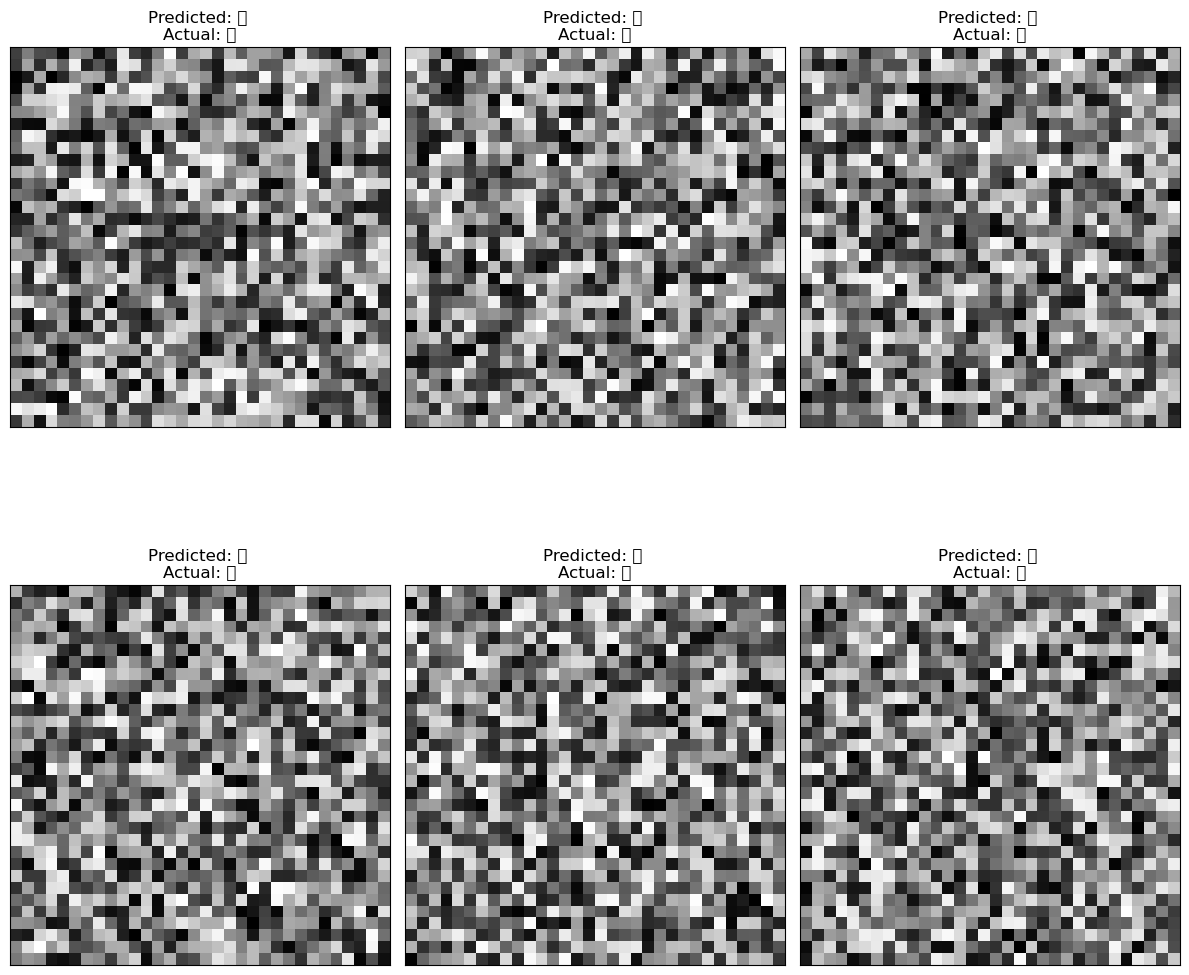

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Define a dictionary mapping indices to Devanagari characters
Char_Dict = {
    0: 'अ', 1: 'आ', 2: 'इ', 3: 'ई', 4: 'उ', 5: 'ऊ', 6: 'ऋ', 7: 'ए', 8: 'ऐ', 9: 'ओ', 10: 'औ', 11: 'क', 12: 'ख', 
    13: 'ग', 14: 'घ', 15: 'ङ', 16: 'च', 17: 'छ', 18: 'ज', 19: 'झ', 20: 'ञ', 21: 'ट', 22: 'ठ', 23: 'ड', 24: 'ढ', 
    25: 'ण', 26: 'त', 27: 'थ', 28: 'द', 29: 'ध', 30: 'न', 31: 'प', 32: 'फ', 33: 'ब', 34: 'भ', 35: 'म', 36: 'य', 
    37: 'र', 38: 'ल', 39: 'व', 40: 'श', 41: 'ष', 42: 'स', 43: 'ह', 44: 'क्ष', 45: 'त्र', 46: 'ज्ञ'
}

# Example data (replace these with your actual data)
num_samples = 100
num_classes = len(Char_Dict)
image_shape = (32, 32)  # Assuming each image is 32x32

# Randomly generate some data for demonstration
np.random.seed(42)
y1_pred = np.random.randint(0, num_classes, size=num_samples)
y1_test = np.random.randint(0, num_classes, size=num_samples)
X_test1 = np.random.rand(num_samples, 1, *image_shape)  # Random grayscale images

# Normalize the images for better contrast
X_test1 = (X_test1 - X_test1.min()) / (X_test1.max() - X_test1.min())

# Find misclassified samples
error = np.where(y1_pred != y1_test)[0]

# Display misclassified samples
plt.figure(figsize=(12, 12))
for i in range(min(6, len(error))):  # Ensure we don't go out of bounds
    print("Predicted:", Char_Dict[y1_pred[error[i]]])
    print("Actual:", Char_Dict[y1_test[error[i]]])
    plt.subplot(2, 3, i + 1)
    plt.imshow(X_test1[error[i], 0], cmap='gray', interpolation='nearest')
    plt.title(f'Predicted: {Char_Dict[y1_pred[error[i]]]} \nActual: {Char_Dict[y1_test[error[i]]]}')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
plt.tight_layout()
plt.show()


Predicted: ल
Actual: ए
Predicted: द
Actual: ड
Predicted: घ
Actual: औ
Predicted: स
Actual: च
Predicted: ञ
Actual: भ
Predicted: ल
Actual: भ


C:\Users\karpu\AppData\Local\Temp\ipykernel_35504\679627263.py:43: UserWarning: Glyph 2354 (\N{DEVANAGARI LETTER LA}) missing from current font.
  plt.tight_layout()
C:\Users\karpu\AppData\Local\Temp\ipykernel_35504\679627263.py:43: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
C:\Users\karpu\AppData\Local\Temp\ipykernel_35504\679627263.py:43: UserWarning: Glyph 2319 (\N{DEVANAGARI LETTER E}) missing from current font.
  plt.tight_layout()
C:\Users\karpu\AppData\Local\Temp\ipykernel_35504\679627263.py:43: UserWarning: Glyph 2342 (\N{DEVANAGARI LETTER DA}) missing from current font.
  plt.tight_layout()
C:\Users\karpu\AppData\Local\Temp\ipykernel_35504\679627263.py:43: UserWarning: Glyph 2337 (\N{DEVANAGARI LETTER DDA}) missing from current font.
  plt.tight_layout()
C:\Users\karpu\AppData\Local\Temp\ipykernel_35504\679627263.py:43: UserWarning: Glyph 2328 (\N{DEVANAGARI LETTER GHA}) missing from current font.
  plt.tight_layout()
C:\Users\

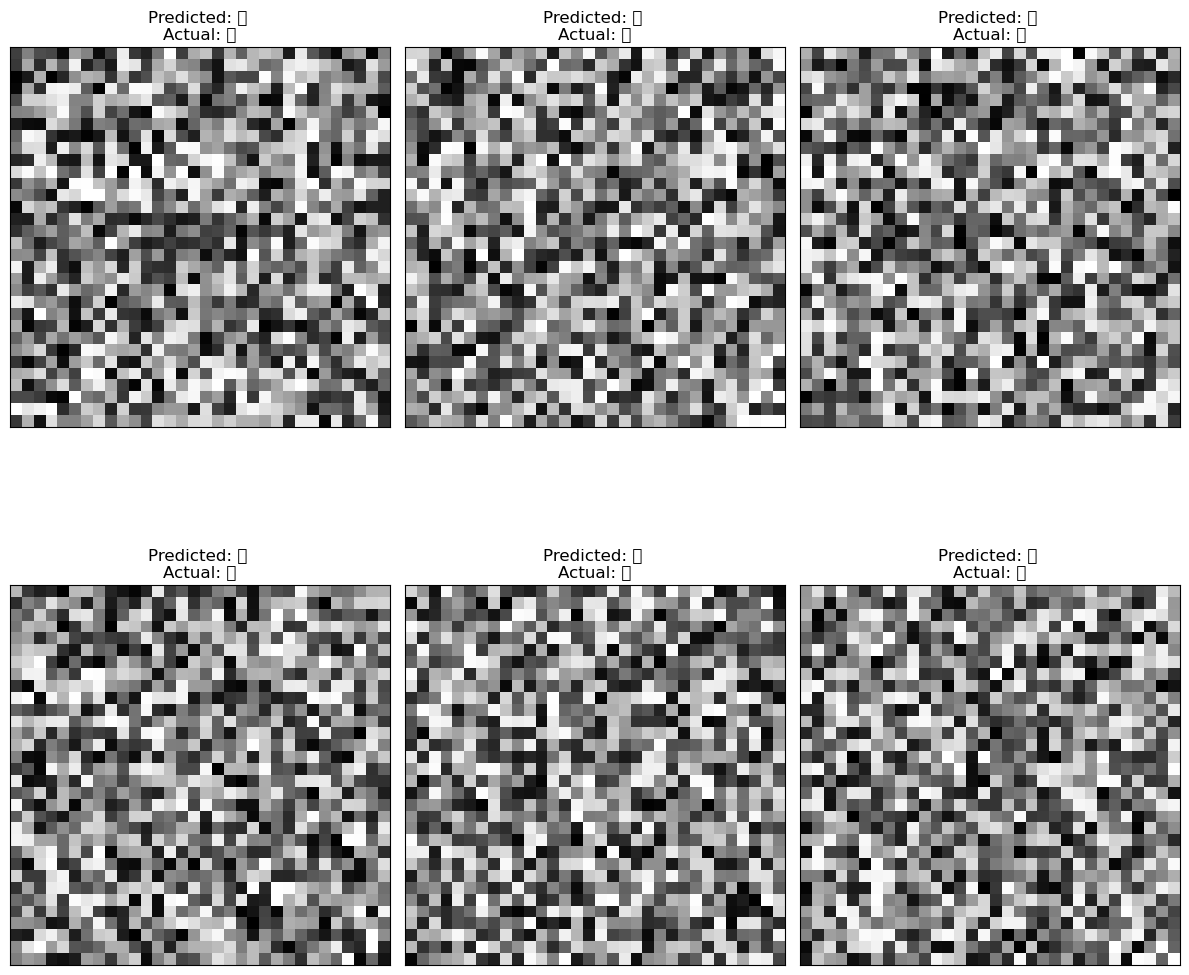

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

# Define a dictionary mapping indices to Devanagari characters
Char_Dict = {
    0: 'अ', 1: 'आ', 2: 'इ', 3: 'ई', 4: 'उ', 5: 'ऊ', 6: 'ऋ', 7: 'ए', 8: 'ऐ', 9: 'ओ', 10: 'औ', 11: 'क', 12: 'ख', 
    13: 'ग', 14: 'घ', 15: 'ङ', 16: 'च', 17: 'छ', 18: 'ज', 19: 'झ', 20: 'ञ', 21: 'ट', 22: 'ठ', 23: 'ड', 24: 'ढ', 
    25: 'ण', 26: 'त', 27: 'थ', 28: 'द', 29: 'ध', 30: 'न', 31: 'प', 32: 'फ', 33: 'ब', 34: 'भ', 35: 'म', 36: 'य', 
    37: 'र', 38: 'ल', 39: 'व', 40: 'श', 41: 'ष', 42: 'स', 43: 'ह', 44: 'क्ष', 45: 'त्र', 46: 'ज्ञ'
}

# Example data (replace these with your actual data)
num_samples = 100
num_classes = len(Char_Dict)
image_shape = (32, 32)  # Assuming each image is 32x32

# Randomly generate some data for demonstration
np.random.seed(42)
y1_pred = np.random.randint(0, num_classes, size=num_samples)
y1_test = np.random.randint(0, num_classes, size=num_samples)
X_test1 = np.random.rand(num_samples, 1, *image_shape)  # Random grayscale images

# Normalize the images for better contrast
X_test1 = (X_test1 - X_test1.min()) / (X_test1.max() - X_test1.min())

# Enhance contrast of images
X_test1 = exposure.equalize_adapthist(X_test1)

# Find misclassified samples
error = np.where(y1_pred != y1_test)[0]

# Display misclassified samples
plt.figure(figsize=(12, 12))
for i in range(min(6, len(error))):  # Ensure we don't go out of bounds
    print("Predicted:", Char_Dict[y1_pred[error[i]]])
    print("Actual:", Char_Dict[y1_test[error[i]]])
    plt.subplot(2, 3, i + 1)
    plt.imshow(X_test1[error[i], 0], cmap='gray', interpolation='nearest')
    plt.title(f'Predicted: {Char_Dict[y1_pred[error[i]]]} \nActual: {Char_Dict[y1_test[error[i]]]}')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
plt.tight_layout()
plt.show()


In [53]:
def cnn_model(X_train, X_test, y_train, y_test, kernel_size, nb_filters, channels, nb_epoch, batch_size, nb_classes):

    model = Sequential()
    model.add(Conv2D(nb_filters, (kernel_size[0], kernel_size[1]),border_mode='valid',input_shape=(img_rows, img_cols,channels)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    kernel_size = (6,6)    
    model.add(Conv2D(20, (kernel_size[0], kernel_size[1])))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())    
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
    print(model.summary())
    model.fit(X_train,y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test,y_test))

    return model